In [2]:
import pandas as pd

In [3]:
dataset = pd.read_csv('cs-training.csv')

In [55]:
dataset.dtypes

Unnamed: 0                                int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [14]:
X=dataset.iloc[:, 2:]

In [6]:
y=dataset['SeriousDlqin2yrs']

In [25]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
def data_split_test_train (X,y, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 0)
    return (X_train, X_test, y_train, y_test)

In [30]:
X_train, X_test, y_train, y_test=data_split_test_train(X,y)

In [164]:
import numpy as np
import seaborn as sns
import pylab
import matplotlib.pyplot as plt

def visulaize(dataset, variable):
    for i in variable:
        if(dataset[i].dtypes == 'float64'):
            A=dataset[i]
            #plot.clear()
            plt.figure(i)
            sns.distplot(A[~np.isnan(A)])
            #plot.show()
            #
        else:
            #plot.clear()
            A=dataset[i]
            plt.figure(i)
            sns.distplot(A[~np.isnan(A)])
            #A.hist(bins=1000)
            #plt.show()
            #plot.show()
    

In [171]:
import numpy as np
import seaborn as sns
import pylab
import matplotlib.pyplot as plt

def visulaizeWO(dataset, variable):
    for i in variable:
        if(dataset[i].dtypes == 'float64'):
            A=dataset[i]
            #plot.clear()
            plt.figure(i)
            plt.boxplot(A[~np.isnan(A)], sym='')
        else:
            #plot.clear()
            print ("later")

later
later


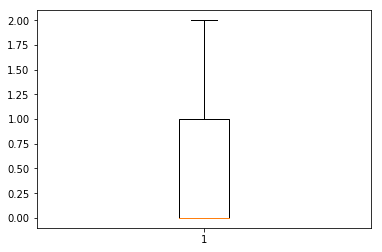

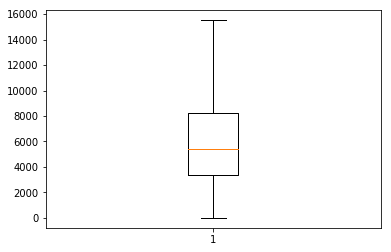

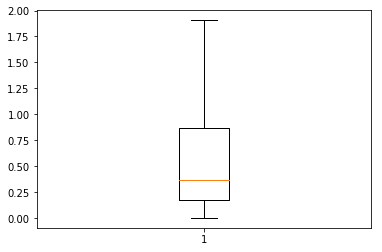

In [172]:
visulaizeWO(dataset,['NumberOfDependents', 'MonthlyIncome', 'DebtRatio', 'age', 'SeriousDlqin2yrs'])

In [184]:
def get_subset_by_IQR(df,column, percentile=0.99):
    for i in column:
        q3 = df[i].quantile(0.99)
        iqr = (df[i] < q3)
        return df.loc[iqr]

In [185]:
data = get_subset_by_IQR(dataset,['MonthlyIncome', 'age'], 0.95)

In [ ]:
# Detect observations with more than one outlier

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[features]))))
    return multiple_outliers   



In [258]:
def missing_value_imputation(df, variables):
        x = {}
        for i in variables:
            if(dataset[i].dtypes == 'float64'):
                x[i]=df[i].fillna(df[i].median())
    
                #dataset.fillna(dataset.mean(), inplace=True)
            else:
                pass
        return x

In [259]:
new=missing_value_imputation(dataset, ['MonthlyIncome'])

In [241]:
# make new columns indicating what will be imputed
from sklearn.preprocessing import Imputer


cols_with_missing = (col for col in new_data.columns 
                                 if new_data[col].isnull().any())
for col in cols_with_missing:
    new_data[col + '_was_missing'] = new_data[col].isnull()

# Imputation
my_imputer = Imputer()
new_data = my_imputer.fit_transform(new_data)

In [261]:
from sklearn.preprocessing import scale

def preprocessing(X_train, X_test):
    X_train_scale=scale(X_train)
    X_test_scale=scale(X_test)
    return (X_train_scale, X_test_scale)

In [263]:
#lable Encoding
from sklearn.preprocessing import LabelEncoder
def LabelEncoding():
    le=LabelEncoder()
    for col in X_test.columns.values:
        if X_test[col].dtypes=='object':
            data=X_train[col].append(X_test[col])
            le.fit(data.values)
            X_train[col]=le.transform(X_train[col])
            X_test[col]=le.transform(X_test[col])

In [264]:
#one-hot encoding
def One_hot_encoding(X_train, X_test, columns):
    for col in columns:
        # creating an exhaustive list of all possible categorical values
        data=X_train[[col]].append(X_test[[col]])
        enc.fit(data)
        # Fitting One Hot Encoding on train data
        temp = enc.transform(X_train[[col]])
        # Changing the encoded features into a data frame with new column names
        temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col].value_counts().index])
        # In side by side concatenation index values should be same
        # Setting the index values similar to the X_train data frame
        temp=temp.set_index(X_train.index.values)
        # adding the new One Hot Encoded varibales to the train data frame
        X_train_1=pd.concat([X_train_1,temp],axis=1)
        # fitting One Hot Encoding on test data
        temp = enc.transform(X_test[[col]])
        # changing it into data frame and adding column names
        temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col].value_counts().index])
        # Setting the index for proper concatenation
        temp=temp.set_index(X_test.index.values)
        # adding the new One Hot Encoded varibales to test data frame
        X_test_1=pd.concat([X_test_1,temp],axis=1)
    return (X_train_1, X_test_1)

In [265]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
def Linear_Regression_basic(X_train, X_test, y_train, y_test):
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    print(lm.intercept_)
    coef=pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
    print (coef)
    predictions = lm.predict(X_test)
    print(predictions)
    print('MAE:', metrics.mean_absolute_error(y_test, predictions))
    print('MSE:', metrics.mean_squared_error(y_test, predictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [266]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
def Logistic_Regression_basic():
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    print(y_pred)
    print(metrics.accuracy_score(y_test, y_pred))
    print(mt.accuracy_score(y_pred,y_test))

NameError: name 'kypred' is not defined

In [ ]:
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

In [ ]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])
    
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)    

In [ ]:
features_boxcox = []

for feature in features:
    bc_transformed, _ = boxcox(df[feature]+1)  # shift by 1 to avoid computing log of negative values
    features_boxcox.append(bc_transformed)

features_boxcox = np.column_stack(features_boxcox)
df_bc = pd.DataFrame(data=features_boxcox, columns=features)
df_bc['Type'] = df['Type']

In [ ]:
n_components = 5
pipelines = []
n_estimators = 200

#print(df.shape)
pipelines.append( ('SVC',
                   Pipeline([
                              ('sc', StandardScaler()),
#                               ('pca', PCA(n_components = n_components, random_state=seed ) ),
                             ('SVC', SVC(random_state=seed))]) ) )


pipelines.append(('KNN',
                  Pipeline([ 
                              ('sc', StandardScaler()),
#                             ('pca', PCA(n_components = n_components, random_state=seed ) ),
                            ('KNN', KNeighborsClassifier()) ])))
pipelines.append( ('RF',
                   Pipeline([
                              ('sc', StandardScaler()),
#                              ('pca', PCA(n_components = n_components, random_state=seed ) ), 
                             ('RF', RandomForestClassifier(random_state=seed, n_estimators=n_estimators)) ]) ))


pipelines.append( ('Ada',
                   Pipeline([ 
                              ('sc', StandardScaler()),
#                              ('pca', PCA(n_components = n_components, random_state=seed ) ), 
                    ('Ada', AdaBoostClassifier(random_state=seed,  n_estimators=n_estimators)) ]) ))

pipelines.append( ('ET',
                   Pipeline([
                              ('sc', StandardScaler()),
#                              ('pca', PCA(n_components = n_components, random_state=seed ) ), 
                             ('ET', ExtraTreesClassifier(random_state=seed, n_estimators=n_estimators)) ]) ))
pipelines.append( ('GB',
                   Pipeline([ 
                             ('sc', StandardScaler()),
#                             ('pca', PCA(n_components = n_components, random_state=seed ) ), 
                             ('GB', GradientBoostingClassifier(random_state=seed)) ]) ))

pipelines.append( ('LR',
                   Pipeline([
                              ('sc', StandardScaler()),
#                               ('pca', PCA(n_components = n_components, random_state=seed ) ), 
                             ('LR', LogisticRegression(random_state=seed)) ]) ))

results, names, times  = [], [] , []
num_folds = 10
scoring = 'accuracy'

for name, model in pipelines:
    start = time()
    kfold = StratifiedKFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring = scoring,
                                n_jobs=-1) 
    t_elapsed = time() - start
    results.append(cv_results)
    names.append(name)
    times.append(t_elapsed)
    msg = "%s: %f (+/- %f) performed in %f seconds" % (name, 100*cv_results.mean(), 
                                                       100*cv_results.std(), t_elapsed)
    print(msg)


fig = plt.figure(figsize=(12,8))    
fig.suptitle("Algorithms comparison")
ax = fig.add_subplot(1,1,1)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# Create a pipeline with a Random forest classifier
pipe_rfc = Pipeline([ 
                      ('scl', StandardScaler()), 
                    ('rfc', RandomForestClassifier(random_state=seed, n_jobs=-1) )])

# Set the grid parameters
param_grid_rfc =  [ {
    'rfc__n_estimators': [100, 200,300,400], # number of estimators
    #'rfc__criterion': ['gini', 'entropy'],   # Splitting criterion
    'rfc__max_features':[0.05 , 0.1], # maximum features used at each split
    'rfc__max_depth': [None, 5], # Max depth of the trees
    'rfc__min_samples_split': [0.005, 0.01], # mininal samples in leafs
    }]
# Use 10 fold CV
kfold = StratifiedKFold(n_splits=num_folds, random_state= seed)
grid_rfc = GridSearchCV(pipe_rfc, param_grid= param_grid_rfc, cv=kfold, scoring=scoring, verbose= 1, n_jobs=-1)

#Fit the pipeline
start = time()
grid_rfc = grid_rfc.fit(X_train, y_train)
end = time()

print("RFC grid search took %.3f seconds" %(end-start))

# Best score and best parameters
print('-------Best score----------')
print(grid_rfc.best_score_ * 100.0)
print('-------Best params----------')
print(grid_rfc.best_params_)

In [ ]:
def plot_learning_curve(train_sizes, train_scores, test_scores, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(train_sizes,train_mean + train_std,
                    train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(train_sizes, test_mean, label='test score', color='red',marker='o')
    plt.fill_between(train_sizes,test_mean + test_std, test_mean - test_std , color='red', alpha=alpha)
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel('Accuracy')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()    
    
def plot_validation_curve(param_range, train_scores, test_scores, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(param_range,train_mean + train_std,
                    train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(param_range, test_mean, label='test score', color='red', marker='o')
    plt.fill_between(param_range,test_mean + test_std, test_mean - test_std , color='red', alpha=alpha)
    plt.title(title)
    plt.grid(ls='--')
    plt.xlabel('Parameter value')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show()

In [ ]:
plt.figure(figsize=(9,6))

train_sizes, train_scores, test_scores = learning_curve(
              estimator= grid_rfc.best_estimator_ , X= X_train, y = y_train, 
                train_sizes=np.arange(0.1,1.1,0.1), cv= 10,  scoring='accuracy', n_jobs= - 1)

plot_learning_curve(train_sizes, train_scores, test_scores, title='Learning curve for RFC')

In [ ]:
# Some useful parameters which will come in handy later on
ntrain = train.shape[0]
ntest = test.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold(ntrain, n_folds= NFOLDS, random_state=SEED)

# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)

In [ ]:
#out-of-fold predictions
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [ ]:
rf = SklearnHelper(clf=RandomForestClassifier, seed=SEED, params=rf_params)
et = SklearnHelper(clf=ExtraTreesClassifier, seed=SEED, params=et_params)
ada = SklearnHelper(clf=AdaBoostClassifier, seed=SEED, params=ada_params)
gb = SklearnHelper(clf=GradientBoostingClassifier, seed=SEED, params=gb_params)
svc = SklearnHelper(clf=SVC, seed=SEED, params=svc_params)



et_oof_train, et_oof_test = get_oof(et, x_train, y_train, x_test) # Extra Trees
rf_oof_train, rf_oof_test = get_oof(rf,x_train, y_train, x_test) # Random Forest
ada_oof_train, ada_oof_test = get_oof(ada, x_train, y_train, x_test) # AdaBoost 
gb_oof_train, gb_oof_test = get_oof(gb,x_train, y_train, x_test) # Gradient Boost
svc_oof_train, svc_oof_test = get_oof(svc,x_train, y_train, x_test) # Support Vector Classifier



rf_feature = rf.feature_importances(x_train,y_train)
et_feature = et.feature_importances(x_train, y_train)
ada_feature = ada.feature_importances(x_train, y_train)
gb_feature = gb.feature_importances(x_train,y_train)

In [ ]:
pca = PCA(random_state = seed)
pca.fit(X_train)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
plt.figure(figsize=(8,6))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance explained', \
       alpha = 0.7)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance explained', \
        color= 'red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()

# Cumulative variance explained
for i, sum in enumerate(cum_var_exp):
    print("PC" + str(i+1), "Cumulative variance: %.3f% %" %(cum_var_exp[i]*100))

In [ ]:
# text data

In [ ]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)



In [ ]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    return words

def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems, lemmas

stems, lemmas = stem_and_lemmatize(words)